# UMAP of PSPA & KD seq

In [11]:
import pandas as pd
from katlas.core import *
from katlas.plot import *
from katlas.feature import *

## kinase info + PSPA data

In [48]:
df = Data.get_kinase_info()

We only kept those kinase domain with active D1 (1525 in HRD motif) and D2 (1724 in DFG motif) -->active_kd_ID and in PSPA

In [14]:
# df[df.kd_ID.notna()&df.active_kd_ID.isna()].to_csv('test.csv')

In [43]:
# df=df[df.active_kd_ID.notna()]

In [49]:
pspa_info = df[df.in_pspa.astype(bool)]

In [50]:
cols = ['kinase','uniprot','modi_group','pspa_category_big','pspa_category_small','family','subfamily','kd_ID']

In [51]:
pspa_info = pspa_info[cols]

The step above when merge, automatically filter out those with _TYR ( they are very non-specific, we'll remove them)

## Umap plot of PSPA PSSM

In [52]:
pspa=Data.get_pspa_all_scale().reset_index()

In [53]:
# add kinase info
info= pspa_info.merge(pspa)

In [54]:
feat = info.iloc[:,-230:]

In [62]:
reduce_feature

<function katlas.plot.reduce_feature(df: pandas.core.frame.DataFrame, method: str = 'pca', complexity: int = 20, n: int = 2, load: str = None, save: str = None, seed: int = 123, **kwargs)>

In [99]:
embed = reduce_feature(feat,method='umap',
                       complexity=7,
                       min_dist=0.6,
                      )

/home/sky1ove/git/KATLAS/katlas/.venv/lib/python3.12/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [56]:
[k for k in group_color.keys() if k in info.modi_group.tolist()]

['CMGC', 'AGC', 'TK', 'TKL', 'CAMK', 'STE', 'CK1', 'NEK', 'Atypical', 'Other']

In [57]:
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
set_sns()

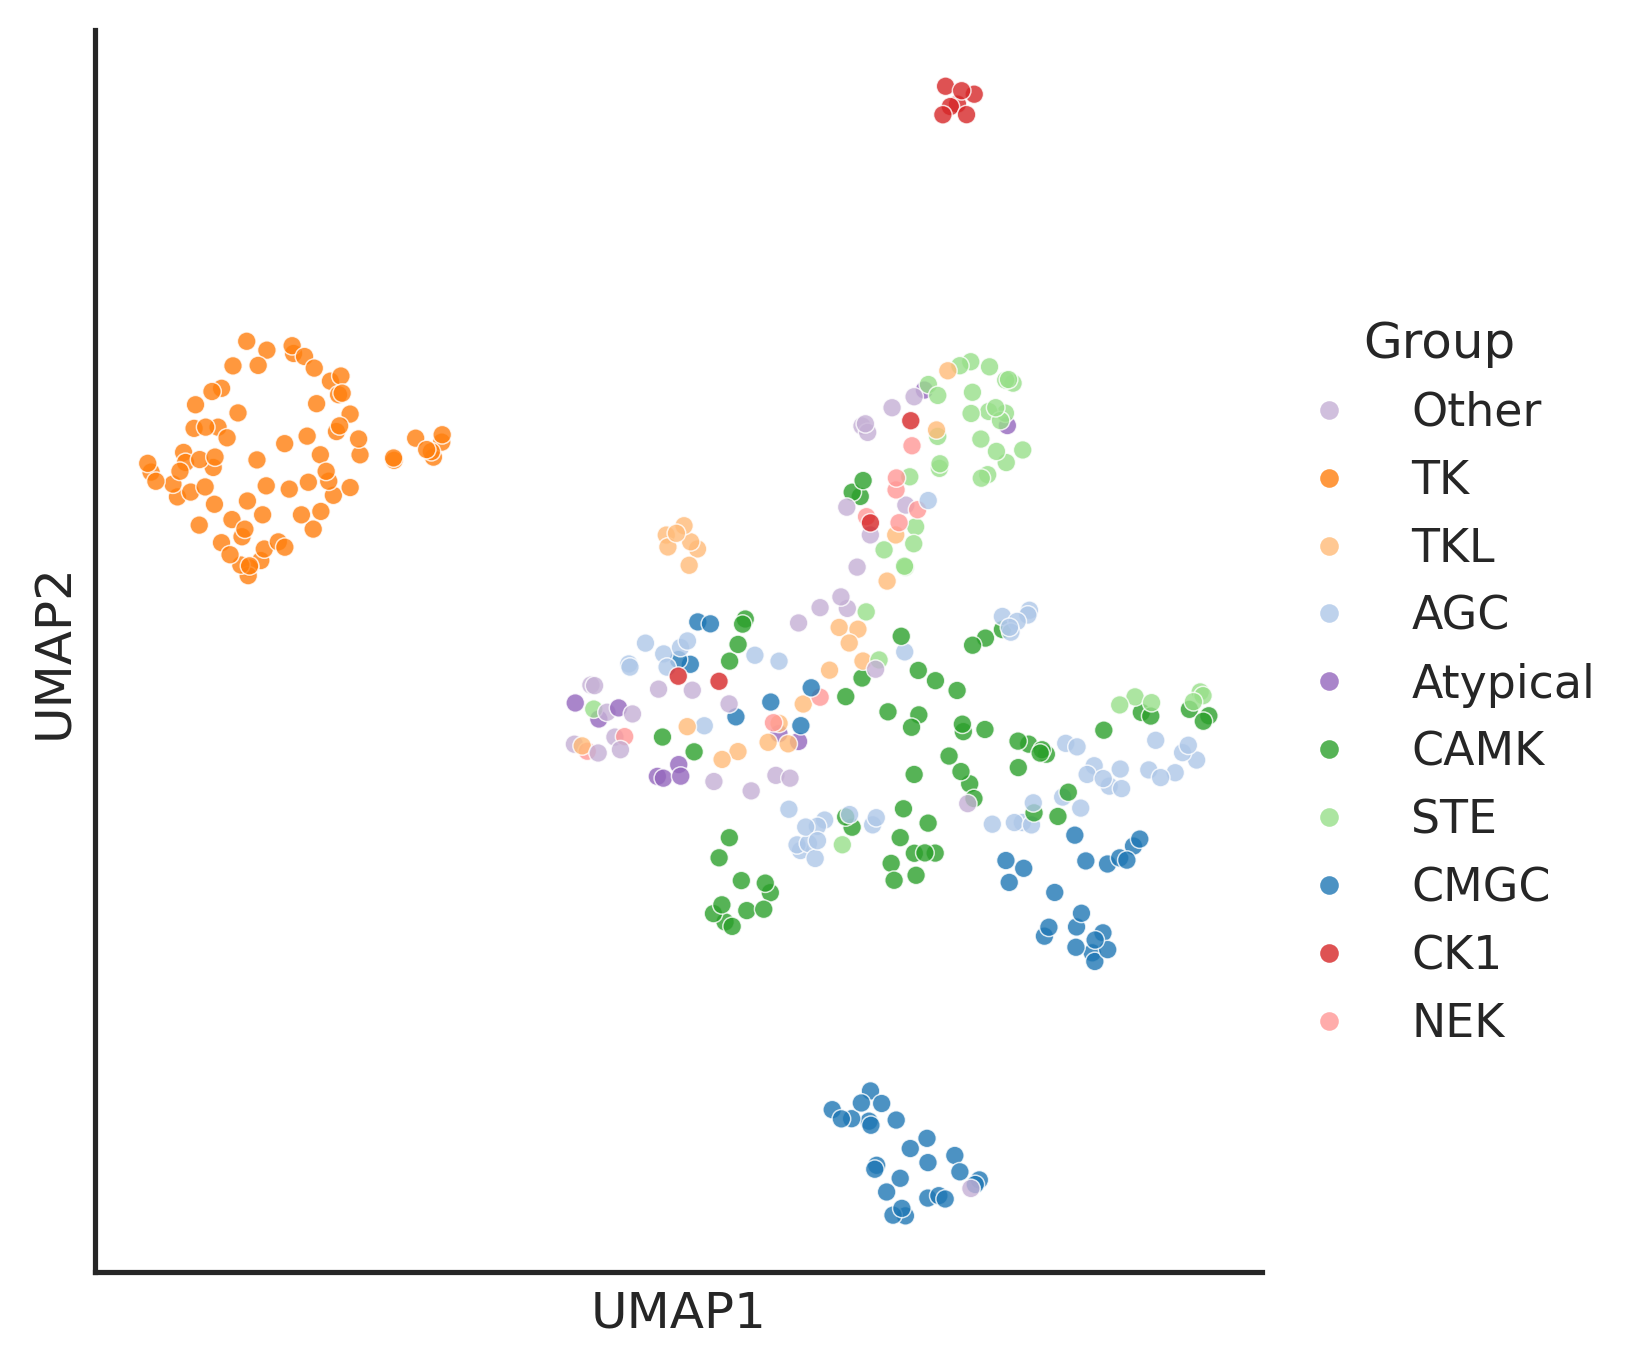

In [100]:
plot_2d(embed,hue=info.modi_group,s=20,
        palette=group_color,legend=True,legend_title='Group')

## Func that wrap all

In [ ]:
def plot_group_pspa_category(info_df, # info df that contain key column for merge with feat_df
                             feat_df, # firt column is key column
                             n_neighbors,
                             min_dist,
                            ):
    merged= info_df.merge(feat_df)

    # Get UMAP embedding
    feat_col = feat_df.columns[1:]
    print('feature columns:', len(feat_col))
    feat = merged[feat_col]
    print('row numbers:', len(feat))
    embed = reduce_feature(feat,'umap',n_neighbors,min_dist=min_dist)

    # Colored by group
    plot_2d(embed,hue=merged.modi_group,hue_title='Group',palette='tab20')

    # Colored by pspa category
    hue_pspa = get_hue_big(merged,'pspa_category_big',10)
    plot_2d(embed,hue=hue_pspa,hue_title='PSPA category',palette='tab20')

    # Colored by pspa category in details
    hue_pspa = get_hue_big(merged,'pspa_category_small',10)
    plot_2d(embed,hue=hue_pspa,hue_title='PSPA category (detailed)',palette='tab20')

feature columns: 230


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


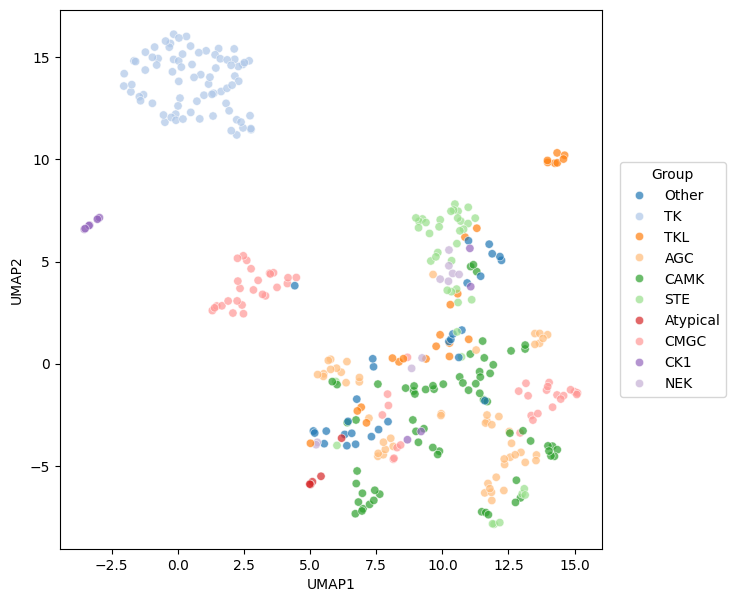

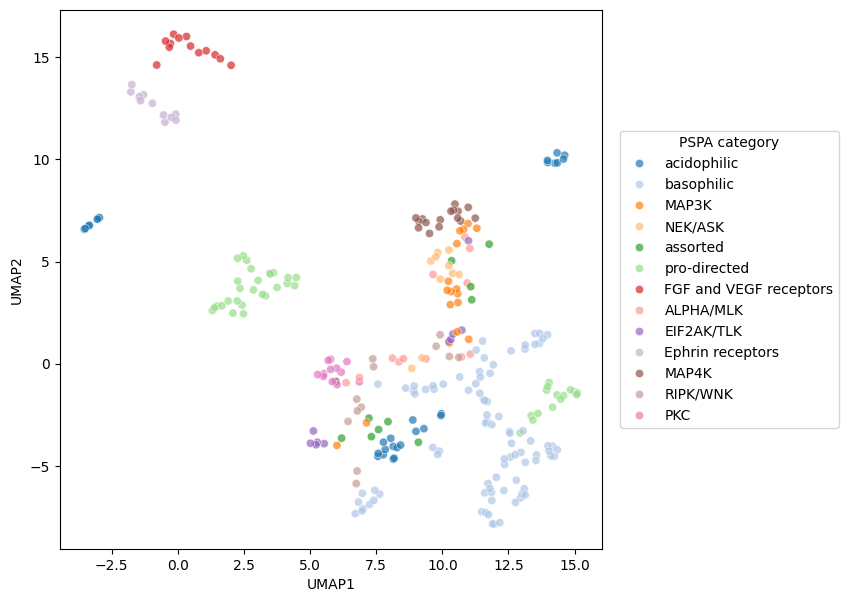

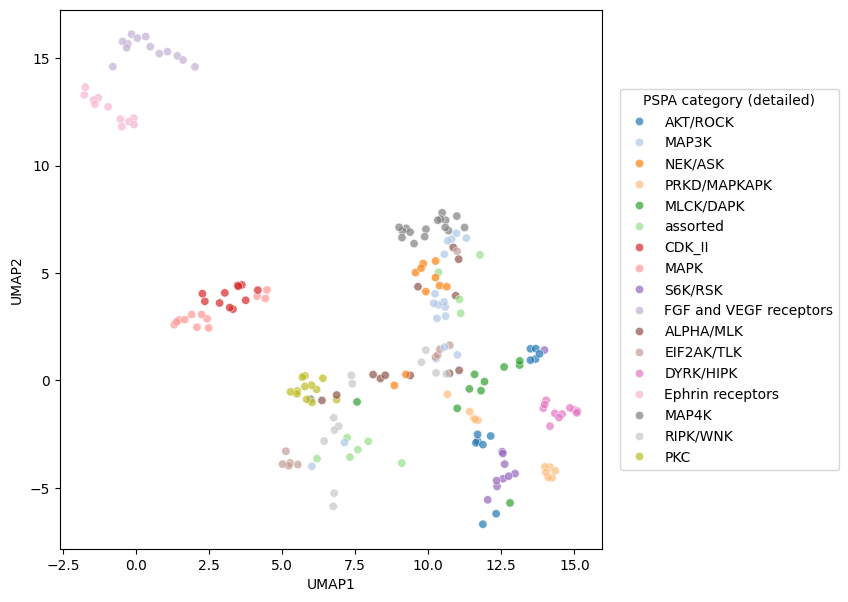

In [ ]:
plot_group_pspa_category(pspa_info,pspa,n_neighbors=5,min_dist=0.6)

## Umap plot of T5 on uniprot kd

In [ ]:
t5 = pd.read_parquet('out/uniprot_kd_t5.parquet').reset_index()

In [ ]:
t5.head()

,kd_ID,T5_0,T5_1,T5_2,T5_3,T5_4,T5_5,T5_6,T5_7,T5_8,...,T5_1014,T5_1015,T5_1016,T5_1017,T5_1018,T5_1019,T5_1020,T5_1021,T5_1022,T5_1023
0,A0A075F7E9_LERK1_ORYSI_KD1,0.014122,0.068848,0.016098,-0.001535,-0.001333,0.021378,0.030289,-0.062408,0.028442,...,-0.029327,0.014893,-0.006218,-0.069824,0.044067,-0.009636,-0.007458,0.021240,0.005234,-0.034637
1,A0A078BQP2_GCY25_CAEEL_KD1,-0.001307,-0.030319,0.020981,0.026642,-0.012787,0.034088,-0.028961,-0.105713,-0.018692,...,-0.038696,-0.036804,-0.016571,-0.072998,0.060852,0.044586,0.002766,-0.014633,0.046051,0.004398
2,A0A078CGE6_M3KE1_BRANA_KD1,0.054504,0.093750,-0.007454,0.018860,-0.042267,-0.005390,-0.004925,-0.046814,-0.013489,...,-0.016037,0.000752,-0.038391,-0.041382,0.069580,-0.022369,-0.026276,-0.001382,0.006645,-0.034485
3,A0A0G2K344_PK3CA_RAT_KD1,0.030807,0.127075,0.007271,-0.018631,0.007950,0.019165,-0.024902,-0.068176,-0.020386,...,-0.018188,-0.014389,-0.023575,0.006779,0.052277,-0.052155,-0.023071,0.034332,0.002714,-0.007095
4,A0A0H2ZM62_HK06_STRP2_KD1,0.020813,-0.063660,-0.013458,0.045715,-0.035828,0.039062,0.024445,-0.089233,0.005287,...,-0.054688,0.024170,0.007973,-0.101318,0.066223,0.005753,-0.048492,0.015091,0.024933,0.019699


feature columns: 1024


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


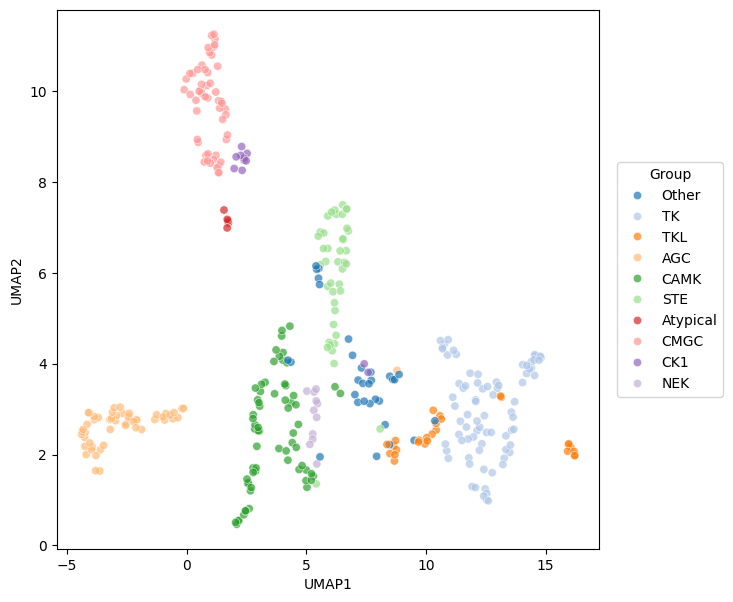

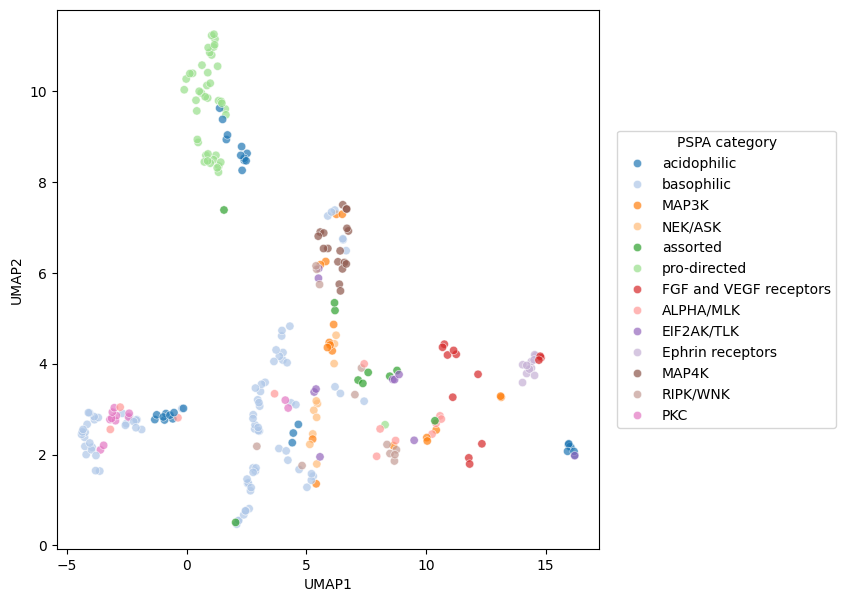

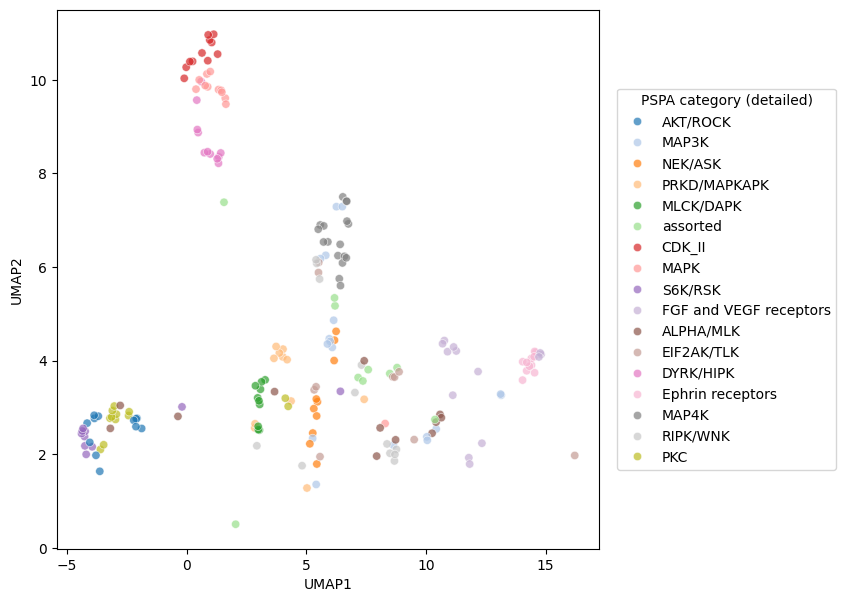

In [ ]:
plot_group_pspa_category(pspa_info,t5,n_neighbors=10,min_dist=0.3)

## Umap plot of T5 on Kinasecome sequence

In [ ]:
info = Data.get_kinase_info()

In [ ]:
info.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'modi_group', 'group',
       'family', 'subfamily_coral', 'subfamily', 'in_pspa_st', 'in_pspa_tyr',
       'in_pspa', 'in_cddm', 'kd_ID', 'active_D1_D2', 'active_kd_ID',
       'pspa_ID', 'pseudo', 'pspa_category_small', 'pspa_category_big',
       'cddm_big', 'cddm_small', 'length', 'human_uniprot_sequence',
       'kinasecom_domain', 'nucleus', 'cytosol', 'cytoskeleton',
       'plasma membrane', 'mitochondrion', 'Golgi apparatus',
       'endoplasmic reticulum', 'vesicle', 'centrosome', 'aggresome',
       'main_location'],
      dtype='object')

In [ ]:
kd_seq = info[['kd_ID','kinasecom_domain']]

In [ ]:
pspa_info_seq = pspa_info[cols].merge(kd_seq)

In [ ]:
from katlas.feature import *

In [ ]:
kinasecom = get_t5(pspa_info_seq,'kinasecom_domain')

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


  0%|          | 0/376 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


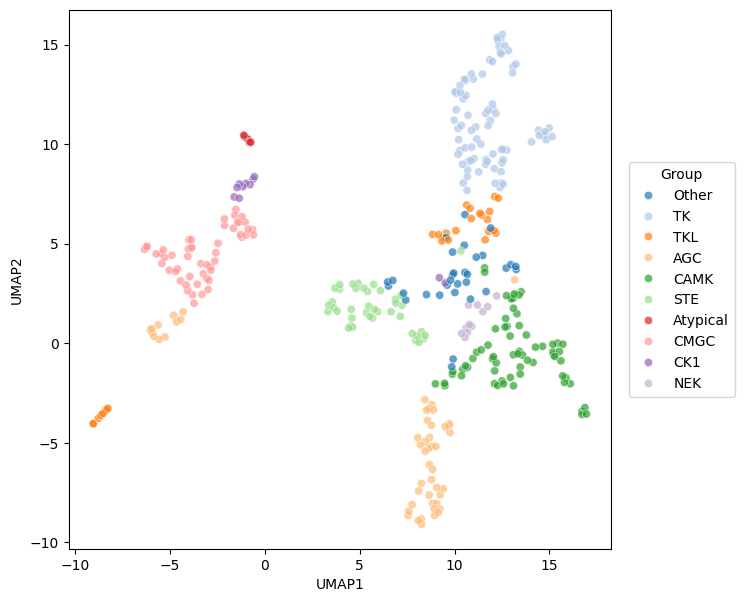

In [ ]:
embed = reduce_feature(kinasecom,'umap',5,min_dist=0.6)
plot_2d(embed,hue=pspa_info_seq.modi_group,hue_title='Group',palette='tab20')

## Onehot encode

In [ ]:
align = pd.read_parquet('out/uniprot_kd_align.parquet')

In [ ]:
align.shape

(5536, 3434)

In [ ]:
active=(align[1525]=='D')& (align[1724]=='D')

In [ ]:
active.value_counts()

True     4209
False    1327
Name: count, dtype: int64

In [ ]:
align = align[active]

In [ ]:
# check 'pseudo alignment' nbs to know how to get freq_max
freq_max = pd.read_csv('out/align_freq_max_aa.csv')

In [ ]:
freq_max

,position,aa,max_value
0,1549,N,0.815390
1,2618,D,0.809429
2,1724,D,0.800759
3,1525,D,0.791004
4,1730,G,0.775470
...,...,...,...
214,193,E,0.101879
215,640,G,0.101879
216,922,L,0.101337
217,603,R,0.101156


In [ ]:
onehot_col = freq_max[freq_max.max_value>0.05].position.sort_values().tolist()

In [ ]:
onehot = align[onehot_col]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def get_onehot(df):
    df=df.copy()
    encoded_df = pd.DataFrame(index=df.index)
    
    encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
    
    for col in df.columns:
        reshaped = df[[col]]  # keep as DataFrame
        encoded = encoder.fit_transform(reshaped)
        aa_labels = encoder.categories_[0]
        new_col_names = [f"{col}_{aa}" for aa in aa_labels]
        encoded_subdf = pd.DataFrame(encoded,index=df.index)
        encoded_subdf.columns=new_col_names
        encoded_df = pd.concat([encoded_df, encoded_subdf], axis=1)
    return encoded_df

In [ ]:
encoded_active=get_onehot(onehot)

## Umap of onehot

In [ ]:
feat_df = encoded_active.reset_index()

feature columns: 4071
row numbers: 376


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


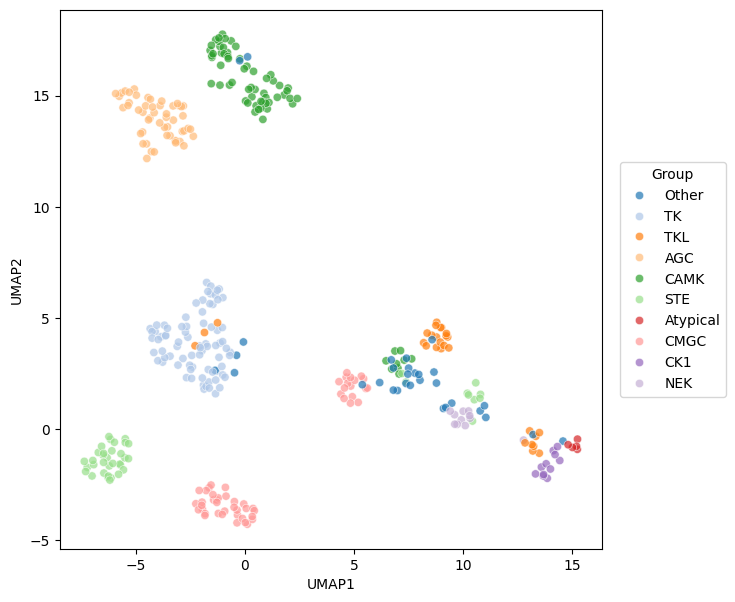

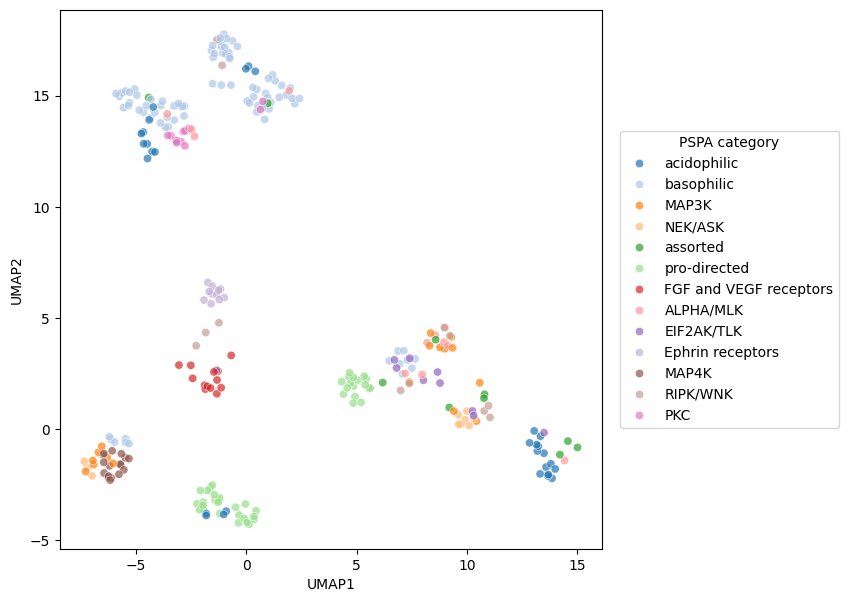

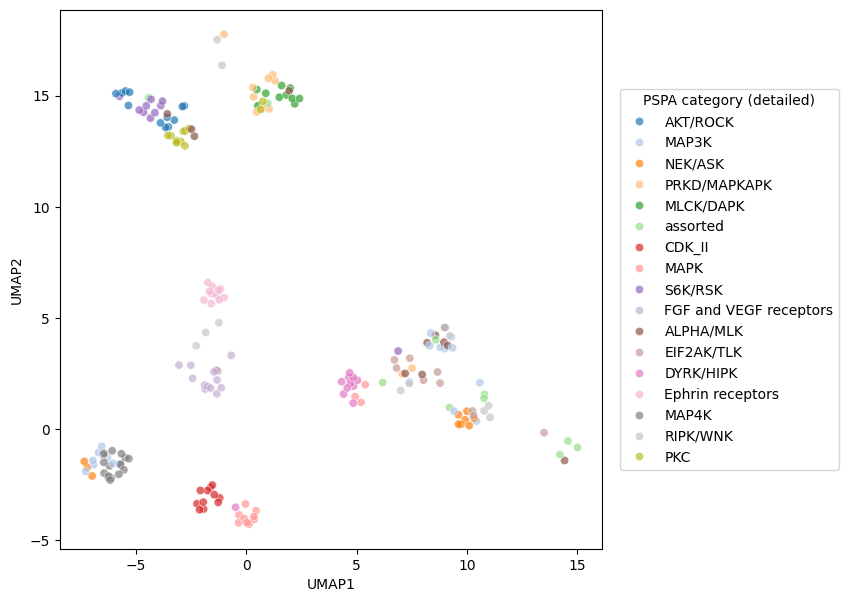

In [ ]:
plot_group_pspa_category(pspa_info,feat_df,n_neighbors=15,min_dist=0.7)

In [ ]:
embed = reduce_feature(encoded_active,
                        'umap',
                        complexity=20,
                       min_dist=0.5
                       )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
hue_is_PSPA=embed.index.isin(pspa_info.kd_ID)

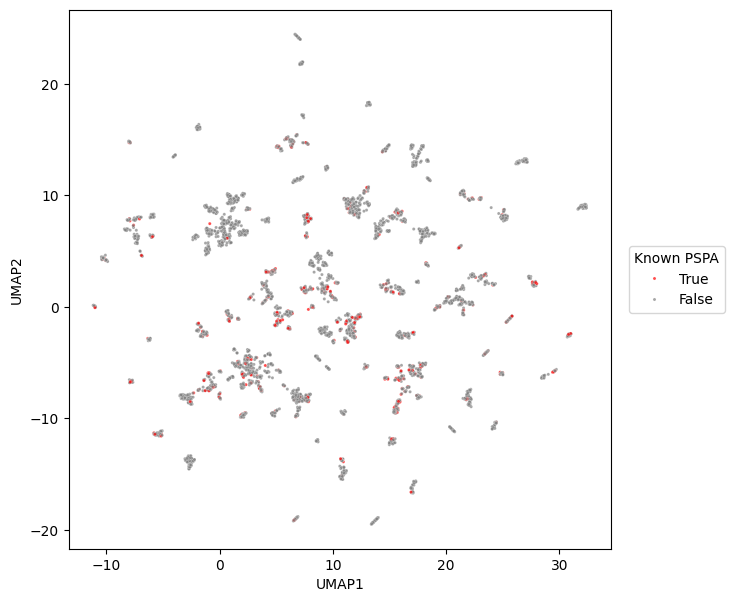

In [ ]:
plot_2d(embed,
        hue_title='Known PSPA',
        # alpha=0.5,
        hue = hue_is_PSPA,
        hue_order=[True, False],
        s=5,
        palette={True: 'red', False: 'gray'})

## PSPA kd plot

In [ ]:
encoded_df = get_onehot(onehot_pspa)

In [ ]:
encoded_df

,65_-,65_A,65_C,65_E,65_F,65_I,65_K,65_L,65_N,65_Q,...,3192_K,3192_L,3192_M,3192_Q,3192_R,3192_S,3192_T,3192_V,3192_W,3192_Y
kd_ID,,,,,,,,,,,,,,,,,,,,,
Q2M2I8_AAK1_HUMAN_KD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P27037_AVR2A_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q13705_AVR2B_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P31749_AKT1_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P31751_AKT2_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P17948_VGFR1_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
P35968_VGFR2_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P35916_VGFR3_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
umap2d = reduce_feature(encoded_df,
                        'umap',
                        complexity=15,
                       min_dist=0.7
                       )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
hue_pspa = pspa_active_kd_remove2kd.set_index('kd_ID')['pspa_category']
hue_group = pspa_active_kd_remove2kd.set_index('kd_ID')['group']

In [ ]:
enrich_group = hue_pspa.value_counts()[hue_pspa.value_counts()>10].index

In [ ]:
hue_pspa_partial = hue_pspa[hue_pspa.isin(enrich_group)]

In [ ]:
group_color = pd.read_csv('raw/group_color.csv')

In [ ]:
group_color = group_color.set_index('Label')['Color'].to_dict()

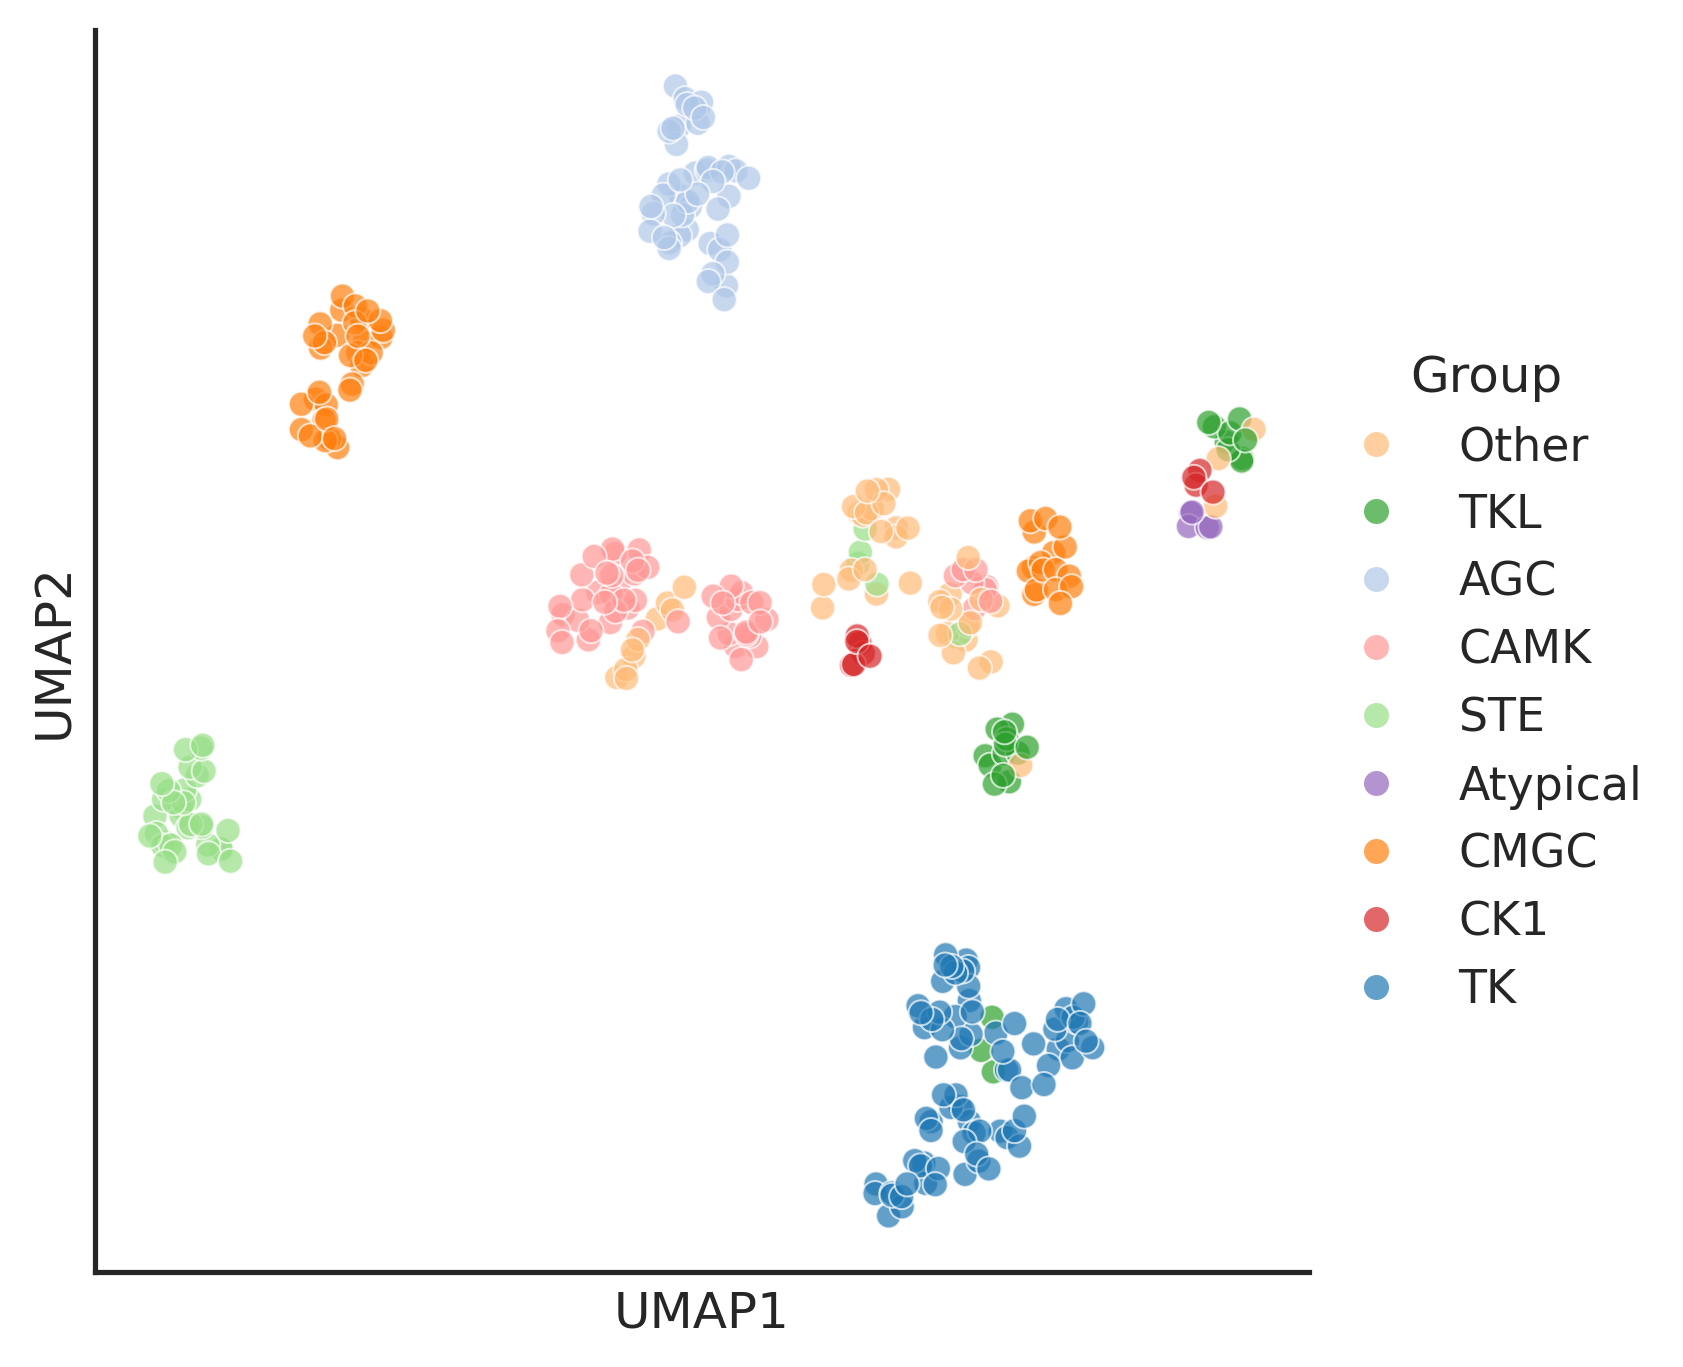

In [ ]:
plot_umap(umap2d,box_title='Group',hue=hue_group, palette=group_color)

In [ ]:
pspa_color = get_color_dict(hue_pspa_partial.unique())

In [ ]:
def rgb_to_hex(rgb_dict):
    """
    Convert a dictionary with RGB values in [0, 1] to hex color codes.
    """
    hex_dict = {
        key: '#{:02X}{:02X}{:02X}'.format(
            int(r * 255), int(g * 255), int(b * 255)
        )
        for key, (r, g, b) in rgb_dict.items()
    }
    return hex_dict

In [ ]:
pspa_color = rgb_to_hex(pspa_color)

In [ ]:
pspa_color = pd.DataFrame.from_dict(pspa_color,orient='index').reset_index()

In [ ]:
pspa_color.columns=['Label','Color']

In [ ]:
# pspa_color.to_csv('raw/pspa_color.csv',index=False)

In [ ]:
pspa_color=pd.read_csv('raw/pspa_color.csv')

In [ ]:
pspa_color = pspa_color.set_index('Label')['Color'].to_dict()

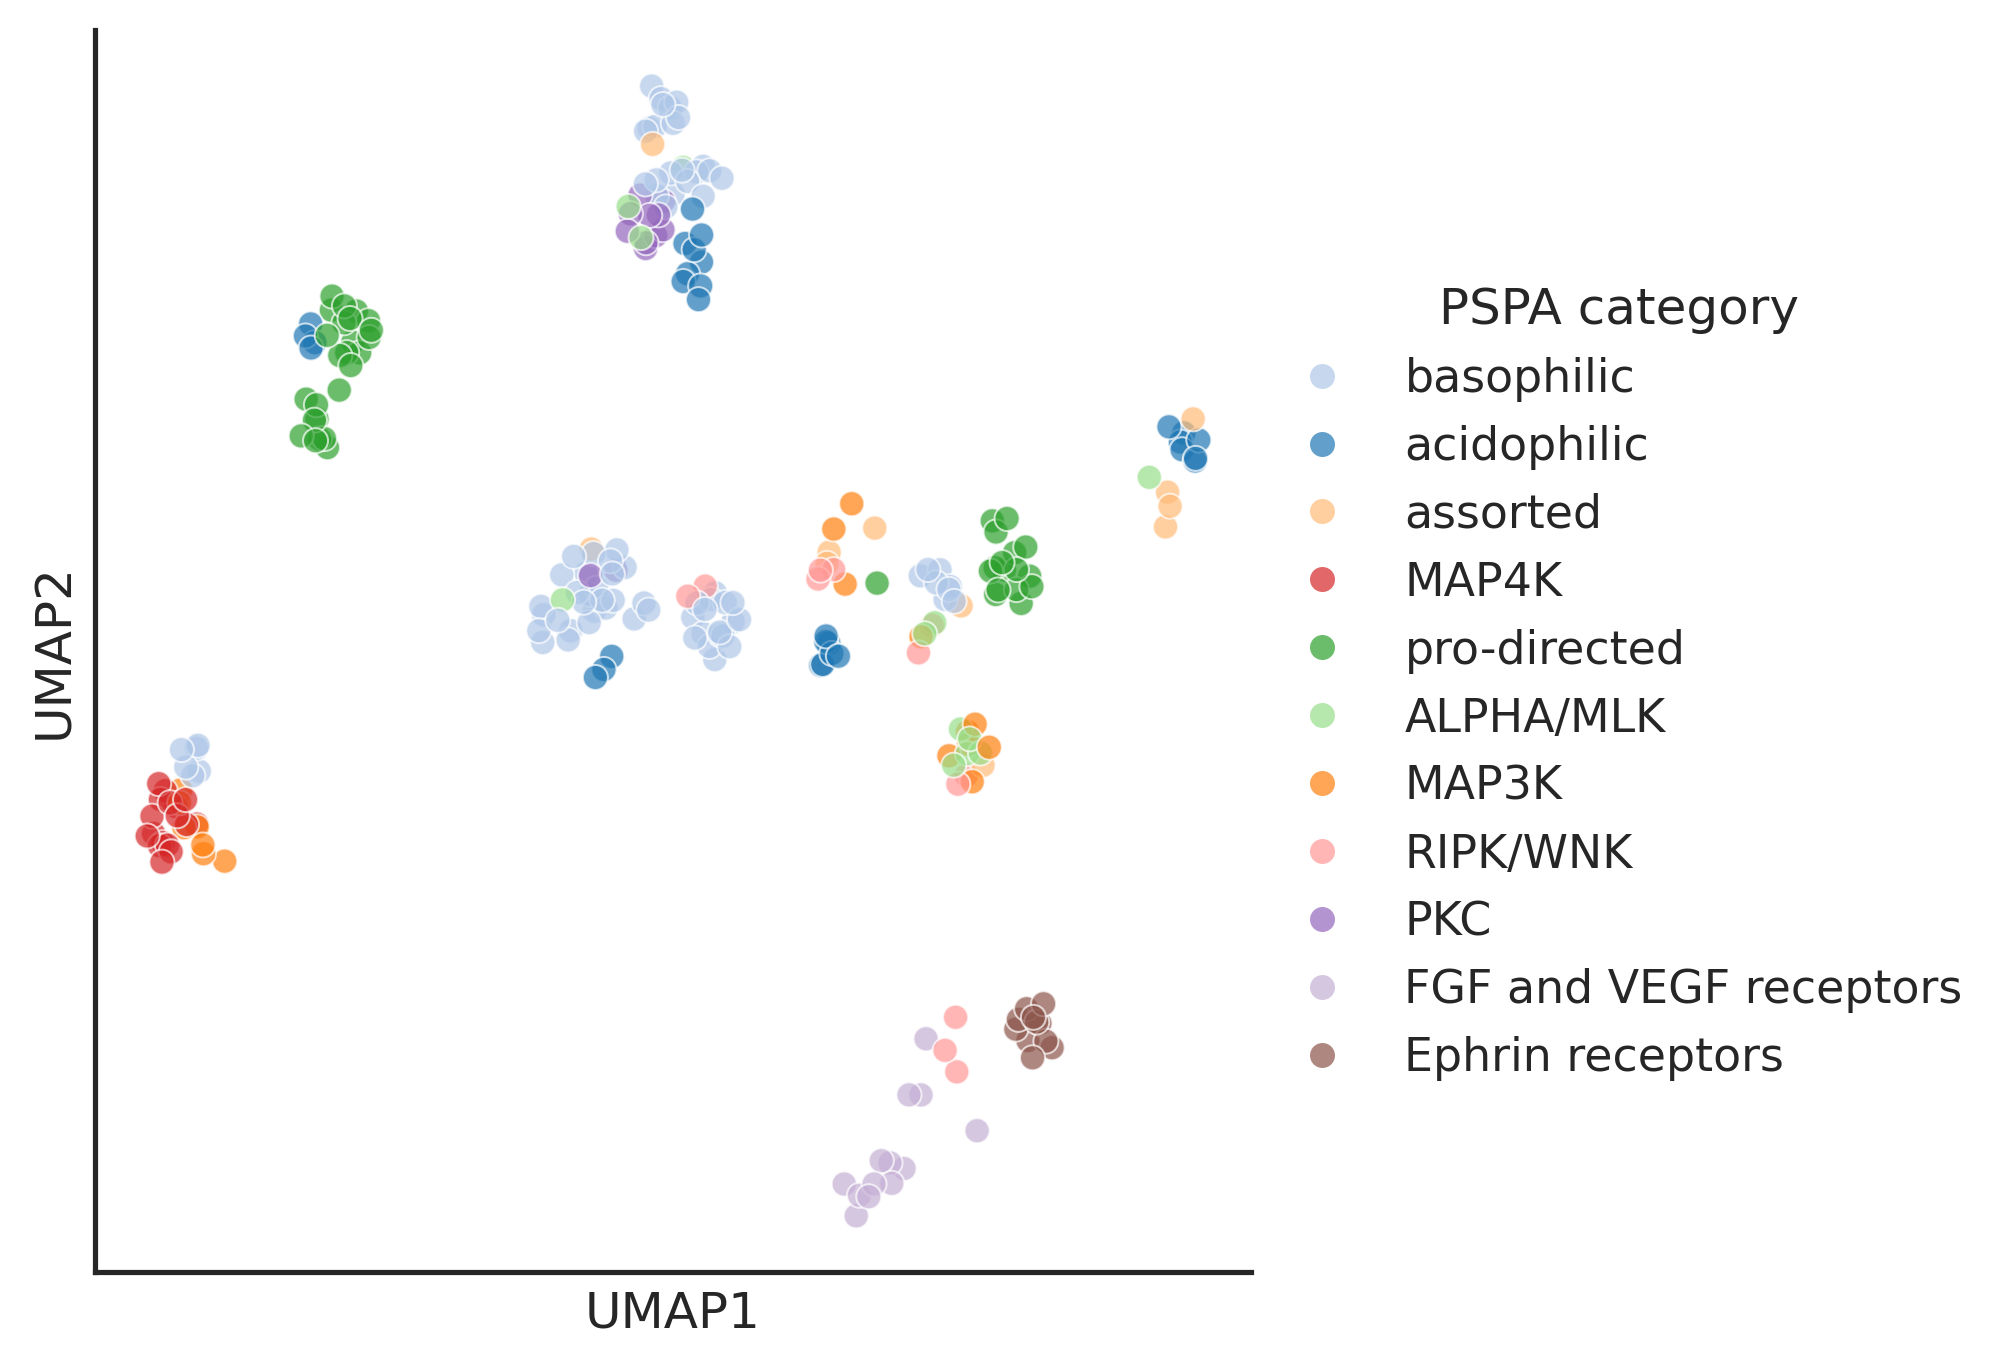

In [ ]:
plot_umap(umap2d,box_title='PSPA category',hue=hue_pspa_partial,palette=pspa_color)